In [1]:
from eis.EISDataIO import eis_dataframe_from_csv, ECM_from_raw_strings
from eis.EISPlot import plot_eis
from eis.scoring import circuit_CV_optimized_score

from os import path

In [2]:
# loading training data

# if you are on a windows machine un-comment the following line to get the path to training data
# here = !echo %cd%

# if you are on a mac/ unix machine un-comment the following line to get the path to training data
here = !pwd

train_data_path = path.join(path.dirname(here[0]), "train_data.csv")
eis_data = eis_dataframe_from_csv(train_data_path)

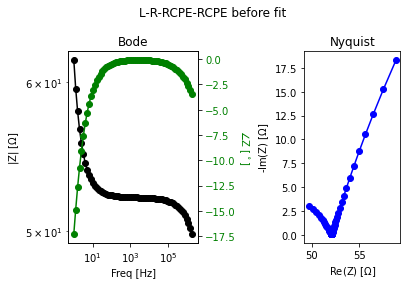

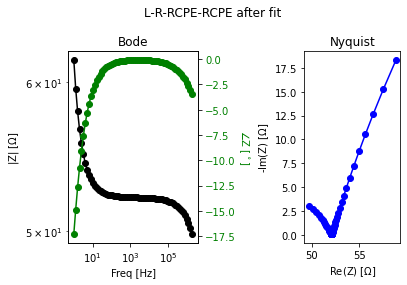

perfect circuit guess cv score: 5.739328371061013e-06


In [3]:
# Try fitting a circuit model w/ perfect initial guesses
sample = eis_data.loc[eis_data.Circuit == "L-R-RCPE-RCPE"].iloc[0,:]
circuit = ECM_from_raw_strings(sample.Circuit, sample.Parameters)
plot_eis(sample.freq, sample.Z, ECM=circuit, title=sample.Circuit + " before fit")
circuit.fit(sample.freq, sample.Z)
plot_eis(sample.freq, sample.Z, ECM=circuit, title=sample.Circuit + " after fit")

circuit = ECM_from_raw_strings(sample.Circuit, sample.Parameters)
print(f"perfect circuit guess cv score: {circuit_CV_optimized_score(circuit, sample.freq, sample.Z)}")

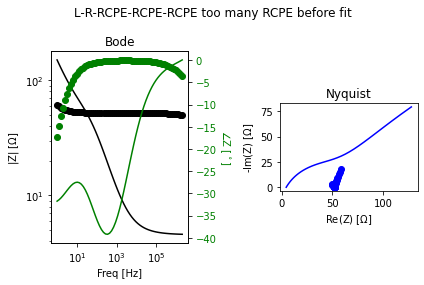

wrong ecm cv score: 4.822428482583037


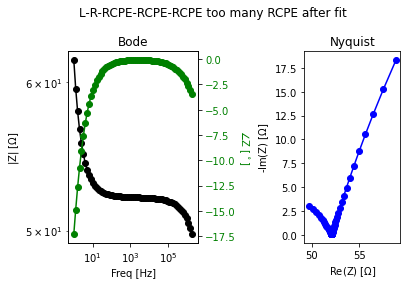

In [4]:
# Try scoring model w/ incorrect ECM using cross validation
sample2 = eis_data.loc[eis_data.Circuit == "L-R-RCPE-RCPE-RCPE"].iloc[0,:]
circuit2 = ECM_from_raw_strings(sample2.Circuit, sample2.Parameters)
plot_eis(sample.freq, sample.Z, ECM=circuit2, title=sample2.Circuit + " too many RCPE before fit")
print(f"wrong ecm cv score: {circuit_CV_optimized_score(circuit2, sample.freq, sample.Z)}")
circuit2.fit(sample.freq, sample.Z)
plot_eis(sample.freq, sample.Z, ECM=circuit2, title=sample2.Circuit + " too many RCPE after fit")

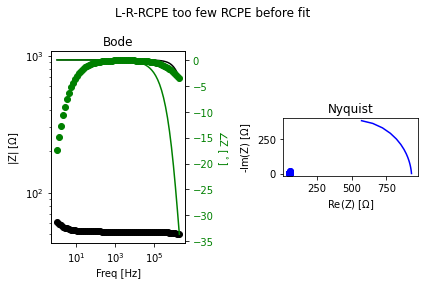

wrong ecm cv score: 4.353443536625903


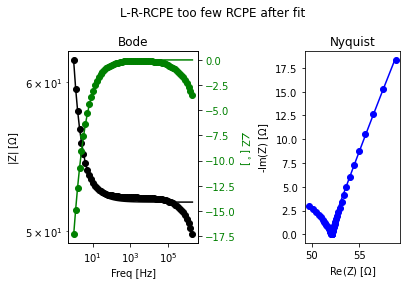

In [5]:
# Try scoring model w/ incorrect ECM using cross validation
sample2 = eis_data.loc[eis_data.Circuit == "L-R-RCPE"].iloc[0,:]
circuit2 = ECM_from_raw_strings(sample2.Circuit, sample2.Parameters)
plot_eis(sample.freq, sample.Z, ECM=circuit2, title=sample2.Circuit + " too few RCPE before fit")
print(f"wrong ecm cv score: {circuit_CV_optimized_score(circuit2, sample.freq, sample.Z)}")
circuit2.fit(sample.freq, sample.Z)
plot_eis(sample.freq, sample.Z, ECM=circuit2, title=sample2.Circuit + " too few RCPE after fit")